# || The Sparks Foundation || GRIPJAN21
# NAME : Gaurav Singh
## Task 2 : Implement an image color detector which identifies all the colors in an image

## Color detection in image

In [1]:
# import libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import imutils

In [2]:
#read input image
image="C:/Users/gaurav/Downloads/color.jpg"
image=cv2.imread(image)
image=imutils.resize(image, width=530, height=350)

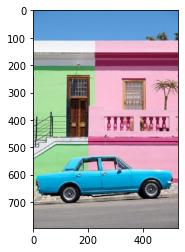

In [3]:
#show image
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [4]:
# load colors csv dataset
colors="C:/Users/gaurav/Downloads/The Sparks Foundation/colors.csv"

index=["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv(colors, names=index, header=None)

In [5]:
#show dataset
csv.head()

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [6]:
clicked = False
r = g = b = xpos = ypos = 0

In [7]:
#color recognition function
def recognize_color(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

In [8]:
#mouse click function
def mouse_click(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = image[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

In [9]:
cv2.namedWindow('Color Recognition App')
cv2.setMouseCallback('Color Recognition App', mouse_click)
while(1):
    cv2.imshow("Color Recognition App",image)
    if (clicked):
        #cv2.rectangle(image, startpoint, endpoint, color, thickness) -1 thickness fills rectangle entirely
        cv2.rectangle(image,(20,20), (750,60), (b,g,r), -1)

        #Creating text string to display ( Color name and RGB values )
        text = recognize_color(r,g,b) + ' R='+ str(r) + ' G='+ str(g) + ' B='+ str(b)

        #cv2.putText(img,text,start,font(0-7), fontScale, color, thickness, lineType, (optional bottomLeft bool) )
        cv2.putText(image, text,(50,50),2,0.8,(0,0,255),2,cv2.LINE_AA)
  #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(image, text,(50,50),2,0.8,(255,0,0),2,cv2.LINE_AA)

        clicked=False

    #Break the loop when user hits 'enter' key 
    if cv2.waitKey(20) & 0xFF ==13:
        break

cv2.destroyAllWindows()

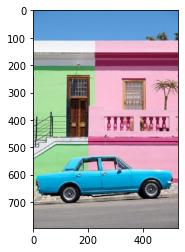

In [10]:
plt.imshow(image)

## Detect color in images and classified based on similar color

In [11]:
#Import libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (3456, 4608, 3)


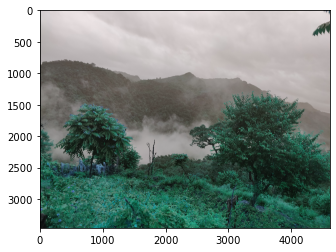

In [12]:
#read a sample image
image = cv2.imread('C:/Users/gaurav/Downloads/sample_image.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

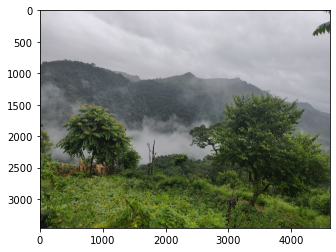

In [13]:
#image convert into BGR to RGB 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

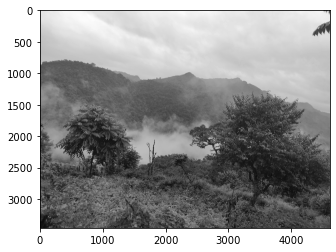

In [14]:
# image convert into BGR to Gray
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

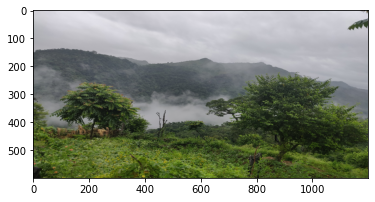

In [15]:
# Resize image
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [16]:
# define a function that can give us the Hex values of our the colors that we will identify
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [17]:
# define function for read images and convert into BGR to RGB 
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [18]:
# Color Identification
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([179.43176145, 180.01880291, 186.42742023]),
 array([55.7050482 , 68.71140605, 34.63537547]),
 array([120.81138866, 125.39097648, 125.17849951]),
 array([83.93731333, 90.80898688, 92.0613779 ]),
 array([79.38829392, 97.32645396, 38.4087461 ]),
 array([206.54114052, 206.24043949, 213.72127354]),
 array([30.86337894, 39.40599388, 21.51584649]),
 array([110.07720588, 125.52542373,  56.8969342 ])]

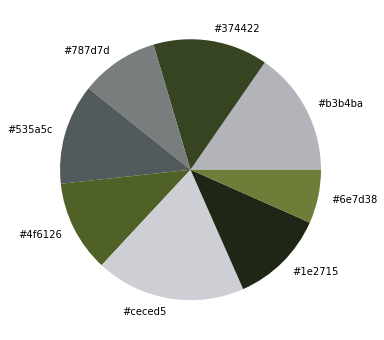

In [19]:
get_colors(get_image('C:/Users/gaurav/Downloads/sample_image.jpg'), 8, True)

In [20]:
#Search images using Color
IMAGE_DIRECTORY = 'C:/Users/gaurav/Downloads/images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'RED': [255, 0, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

Images Dataset


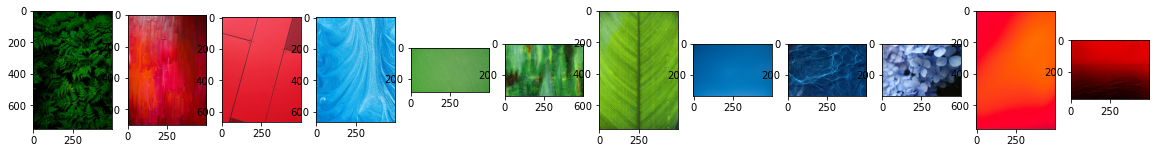

In [21]:
#show all the images
print("Images Dataset")
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [22]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [23]:
#call the above method for all the images in our set and show relevant 
#images out of the same that approximately match our selected color
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

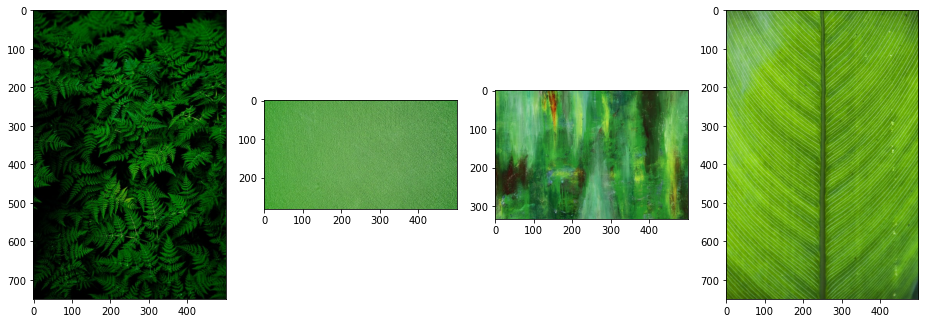

In [24]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

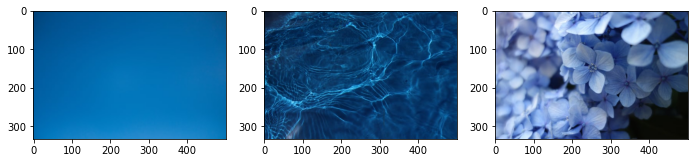

In [25]:
# Search for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

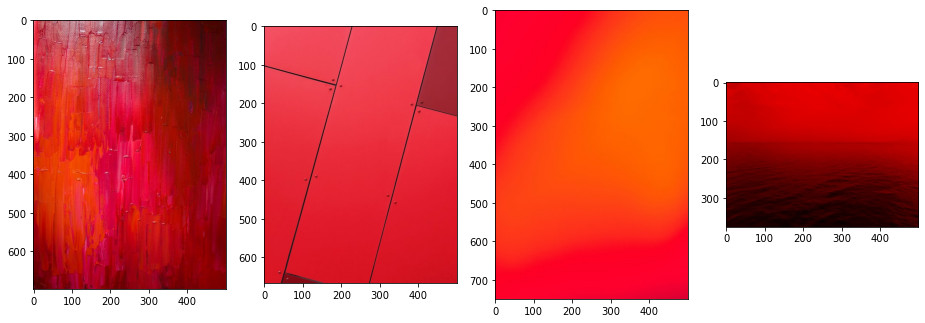

In [26]:
# Search for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)

# Thank You